**Analyzing Amazon Prime**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Gathering the Data**

In [2]:
df = pd.read_csv('amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### **Assesing the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


Checking for missing Values

In [4]:
print("Number of duplicate entries:", df.duplicated().sum())

Number of duplicate entries: 0


### **Cleaning Dataset**

Handle Missing Values

In [5]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)

<ipython-input-5-fa4645bfc11e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-5-fa4645bfc11e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

### **Exploratory Data Analysis (EDA)**

Grouping by rating and type

In [6]:
print(df.groupby(by="rating").agg({'show_id': 'count'}))
print(df.groupby(by="type").agg({'show_id': 'count'}))

          show_id
rating           
13+          2117
16              1
16+          1547
18+          1243
7+            385
AGES_16_        2
AGES_18_        3
ALL          1268
ALL_AGES        1
G              93
NC-17           3
NOT_RATE        3
NR            223
PG            253
PG-13         393
R            1010
TV-14         208
TV-G           81
TV-MA          77
TV-NR         105
TV-PG         169
TV-Y           74
TV-Y7          39
UNRATED        33
Unknown       337
         show_id
type            
Movie       7814
TV Show     1854


Enhanced Analysis: Grouping by both Type and Rating

In [7]:
type_rating_group = df.groupby(['type', 'rating']).size().unstack().fillna(0)
print(type_rating_group)

rating      13+   16     16+     18+     7+  AGES_16_  AGES_18_    ALL  \
type                                                                     
Movie    1849.0  1.0  1272.0  1097.0  288.0       2.0       3.0  988.0   
TV Show   268.0  0.0   275.0   146.0   97.0       0.0       0.0  280.0   

rating   ALL_AGES     G  ...       R  TV-14  TV-G  TV-MA  TV-NR  TV-PG  TV-Y  \
type                     ...                                                   
Movie         1.0  93.0  ...  1010.0    0.0   0.0    0.0    0.0    0.0   0.0   
TV Show       0.0   0.0  ...     0.0  208.0  81.0   77.0  105.0  169.0  74.0   

rating   TV-Y7  UNRATED  Unknown  
type                              
Movie      0.0     33.0    331.0  
TV Show   39.0      0.0      6.0  

[2 rows x 25 columns]


Visualization of Type distribution

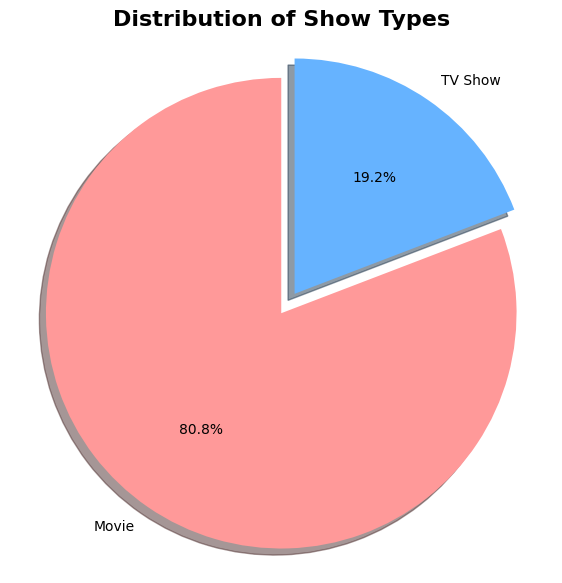

In [8]:
plt.figure(figsize=(7, 7))
colors = ['#ff9999', '#66b3ff']

plt.pie(
    df.groupby(by="type").agg({'show_id': 'count'})['show_id'],
    labels=df.groupby(by="type").agg({'show_id': 'count'}).index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.1, 0],  # Slightly explode the first slice
    shadow=True,
)

plt.title('Distribution of Show Types', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

Additional Visualization: Distribution of Ratings

<ipython-input-9-eb027306e1c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis', order=df['rating'].value_counts().index)


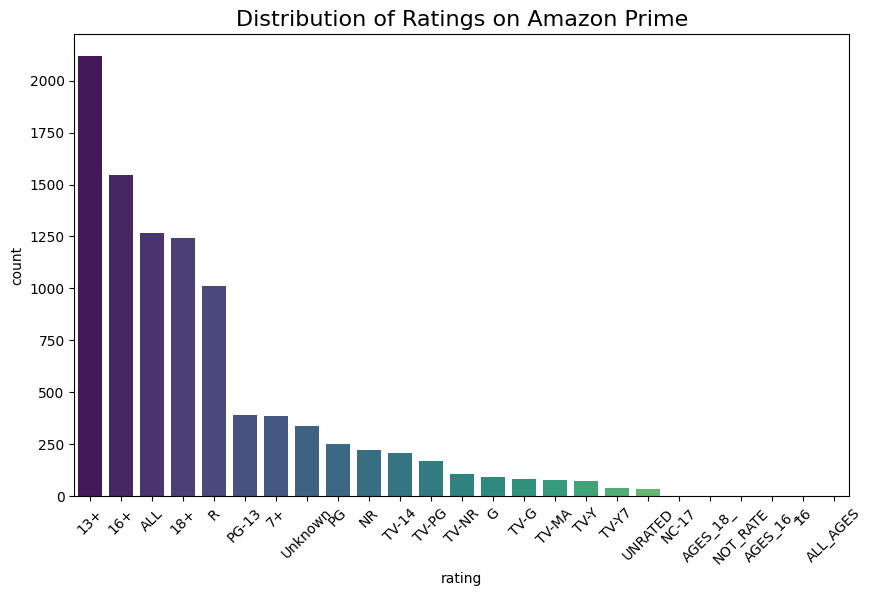

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Amazon Prime', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Additional Visualization: Count of Shows by Year of Release

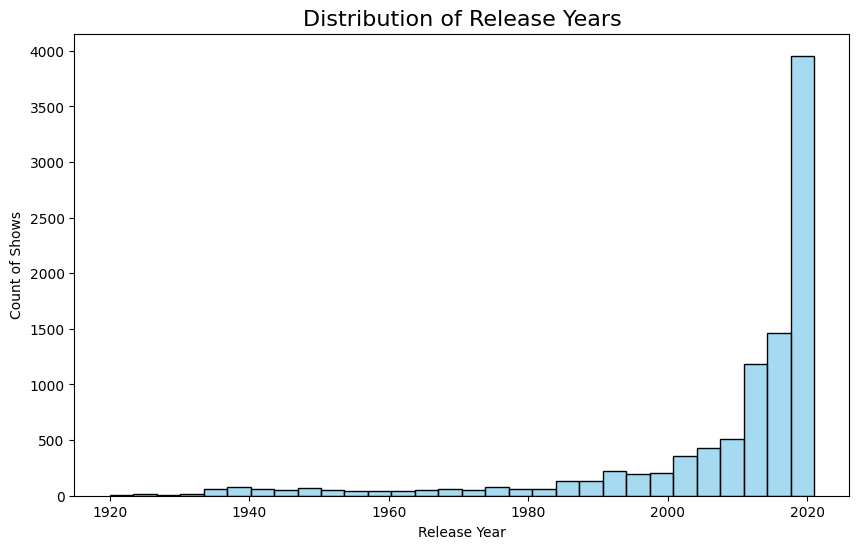

In [10]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Release Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Count of Shows')
plt.show()

Enhanced Analysis: Top 10 Directors by Number of Shows

<ipython-input-11-f2568e17384d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


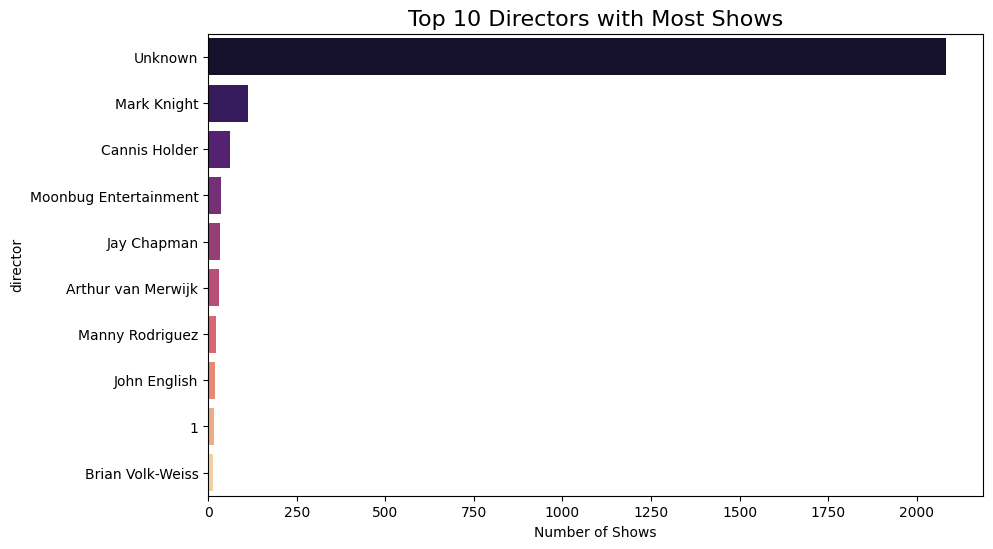

In [11]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors with Most Shows', fontsize=16)
plt.xlabel('Number of Shows')
plt.show()